## Deconvolve microtubules phantom

In this example we use clij2fft non-circulant richardson lucy to deconvolve the microtubules phantom from here http://bigwww.epfl.ch/deconvolution/data/microtubules/

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from tnia.plotting.projections import show_xyz_max
import numpy as np

## Define image locatons and read images

In [2]:
dir_name='D:\\images\\'
#dir_name='/home/bnorthan/Images/'

dir_name='D:\\images\\'
#dir_name='/home/bnorthan/Images/'

im_name = dir_name+'tnia-python-images/deconvolution/microtubules/input.tif'
psf_name = dir_name+'tnia-python-images/deconvolution/microtubules/psf.tif'
truth_name = dir_name+'tnia-python-images/deconvolution/microtubules/ground-truth.tif'

im_name

'D:\\images\\tnia-python-images/deconvolution/microtubules/input.tif'

In [6]:
im=imread(im_name)
psf=imread(psf_name)
truth=imread(truth_name)
print(im.shape, psf.shape)

(128, 256, 512) (128, 256, 512)


## Crop along z 

Since we want to test the benefit of non-circulant deconvolution crop in z direction so the extended object is truncated.  Non-circulant deconvolution should have benefits under these conditions

Text(0.5, 0.98, 'Cropped Truth')

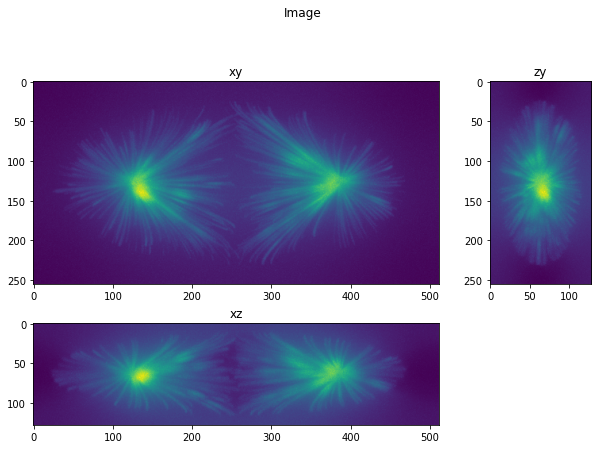

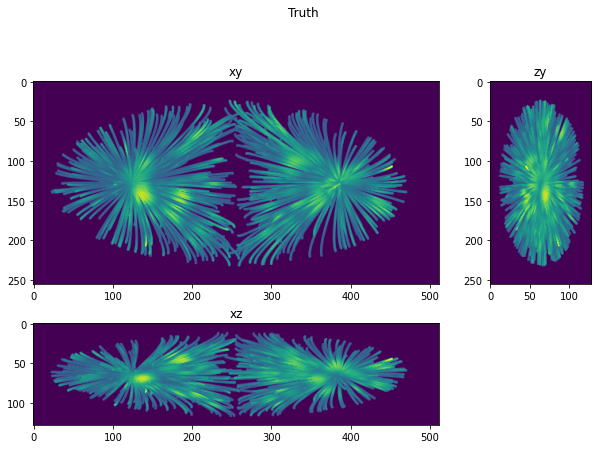

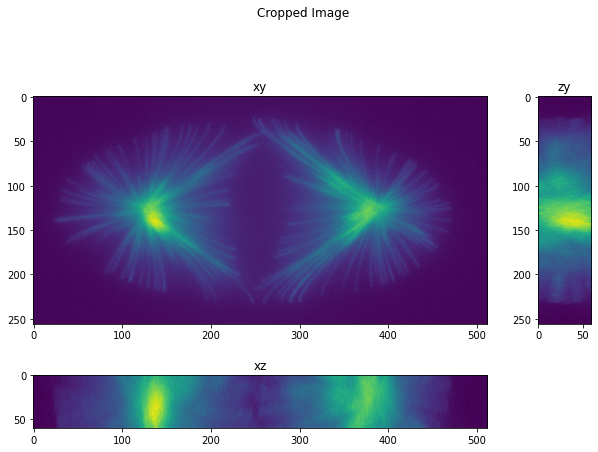

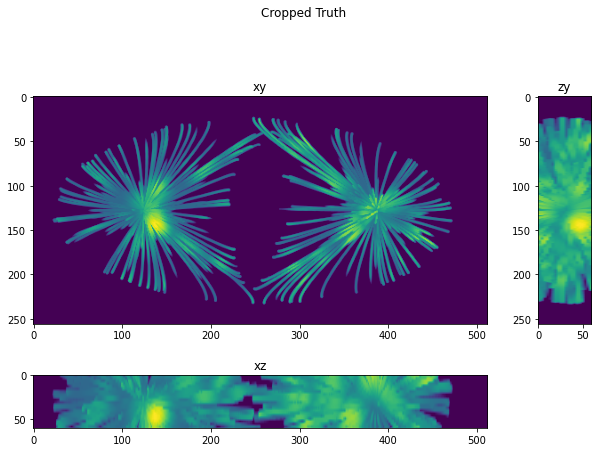

In [7]:
fig=show_xyz_max(im,figsize=(10,7))
fig.suptitle('Image')
fig=show_xyz_max(truth,figsize=(10,7))
fig.suptitle('Truth')
ind = np.s_[54:74, :, :]
im=im[ind]
truth=truth[ind]
fig=show_xyz_max(im,1,3,figsize=(10,7))
fig.suptitle('Cropped Image')
fig=show_xyz_max(truth,1,3,figsize=(10,7))
fig.suptitle('Cropped Truth')

## Crop PSF to make decon a bit faster 

In [8]:
from tnia.nd.ndutil import centercrop
psf=centercrop(psf, (128,128,128))
psf.shape

(128, 128, 128)

## Perform deconvolution with clij2-fft non-circulant algorithm

In [9]:
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
decon_nc=richardson_lucy_nc(im, psf, 400, 0.0005)

get lib


## Perform deconvolution with Red Lion Fish standard RL implementation

In [10]:
import RedLionfishDeconv as rl
decon_rlf=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=400, method='gpu', resAsUint8=False )

ERROR:root:Failed to setup Reikna with OpenCL.
ERROR:root:No module named 'reikna'


In [12]:
from tnia.metrics.errors import RMSE

print(RMSE(truth,truth))
print(RMSE(truth,im))
print(RMSE(truth,decon_nc))
print(RMSE(truth,decon_rlf))


0.0
1018.9625
683.29236
967.203


Text(0.5, 0.98, 'RedFish Decon')

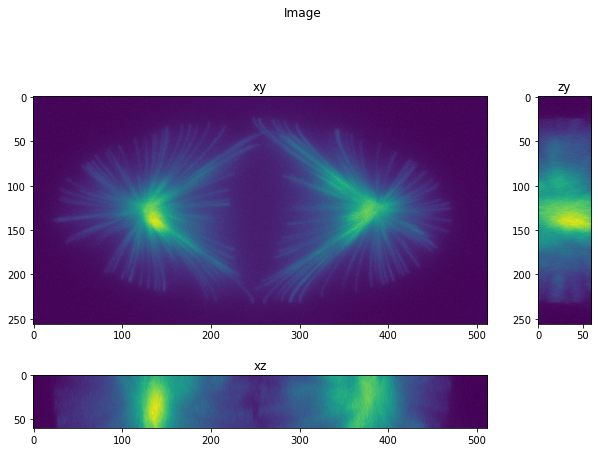

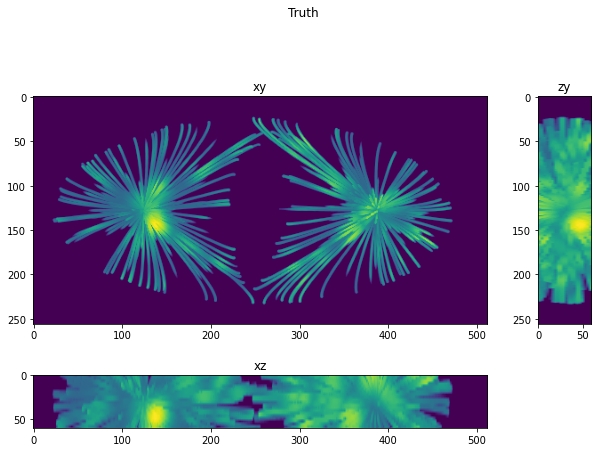

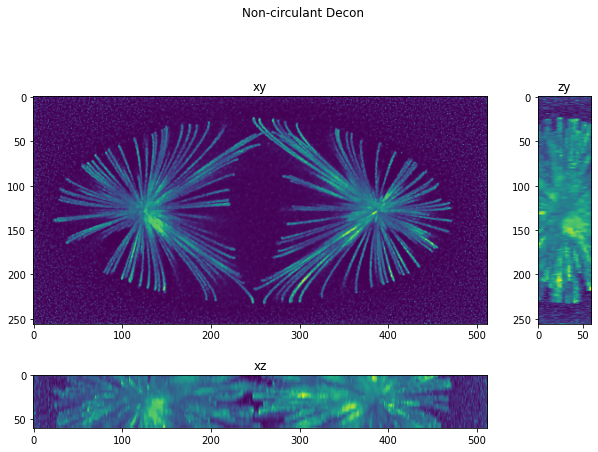

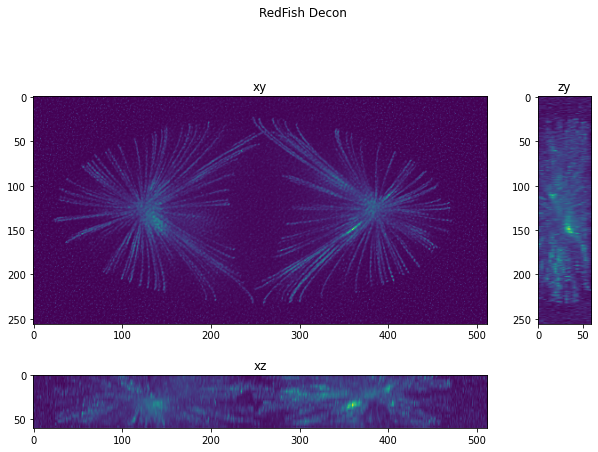

In [13]:
fig=show_xyz_max(im,1,3,figsize=(10,7))
fig.suptitle('Image')
fig=show_xyz_max(truth,1,3,figsize=(10,7))
fig.suptitle('Truth')
fig=show_xyz_max(decon_nc,1,3,figsize=(10,7))
fig.suptitle('Non-circulant Decon')
fig=show_xyz_max(decon_rlf,1,3,figsize=(10,7))
fig.suptitle('RedFish Decon')

In [25]:
import napari
viewer=napari.Viewer()
viewer.add_image(im, scale=(3,1,1))
viewer.add_image(decon_rlf, scale=(3,1,1))
viewer.add_image(decon_nc, scale=(3,1,1))
#viewer.add_image(decon_rlf, scale=(3,1,1))
viewer.add_image(truth, scale=(3,1,1))

C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\jupyter_client\threaded.py", line 122, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\asyncio\base_events.py", line 623, in ru

<Image layer 'truth' at 0x1a21b292dc0>